In [1]:
import numpy as np
import matplotlib.pyplot as plt

# INF 554 Lab 2: Supervised Classification

## Logistic Regression and Gradient Descent


In linear regression, we got a real-valued response
	
$$y = \theta_0 + \theta_1 x_1 + \cdots + \theta_d x_d$$
    
i.e., a linear combination of inputs, where $y \in \mathbf{R}$.

<div class="alert alert-block alert-info">
Note: in this lab we are going to use $\mathbf{\theta}$ to denotate the parameters, instead of $\mathbf{\beta}$ as we introduced in the first lab</div>

In classification, we want an *indication* of how likely an instance is to belong to a particular class; a probability $\in [0,1]$.  

Given a real valued $z$, we can squish it to range $\sigma(z) \in [0,1]$ by feeding it through the **logistic function** aka **sigmoid function**:
		
\begin{equation}
\sigma(z) = \frac{1}{1+\exp(-z)} \hspace{1.5cm}(1)
\end{equation}

Which looks like this: ![Sigmoid](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

Therefore, we can treat this as a probability, i.e.,

\begin{align*}
P(y=1|\mathbf{x}) &= \sigma(\mathbf{\theta}^\top\mathbf{x}) \\
P(y=0|\mathbf{x}) &= 1 - \sigma(\mathbf{\theta}^\top\mathbf{x}) 
\end{align*}

where we omit the bias term and suppose that both $\mathbf{\theta}$ and $\mathbf{x}$ are column vectors.

> **Task 1**: implement the sigmoid function (1). Note that the sigmoid function in NumPy is prone to overflow errors therefore to avoid them you will have to use the <a href="https://numpy.org/doc/stable/reference/generated/numpy.clip.html">clip</a> function to restrain the output of the function within the interval $[0+\epsilon ,1-\epsilon]$. A good enough choice for $\epsilon$ is $0.001$.


In [2]:
def sigmoid(z):
    # insert here the code for Task 1
    s = 1. / (1. + np.exp(-z))
    s = np.clip(s, 0.001, 0.999)
    return s

In order to chose values for the parameters of logistic regression, we use **maximum likelihood estimation** (MLE). As such we are going to have two steps:

1. write the likelihood function;
2. find the values of $\theta$ that maximize the log-likelihood function.

The labels that we are predicting are binary, this means that we can interpret each label as a Bernoulli random variable: $Y \sim Ber(p)$ where $p = \sigma(\mathbf{\theta}^\top\mathbf{x})$.

Therefore, we can write the probability of a data point as:
$$
P\left(Y=y|X=\mathbf{x}\right) = \sigma(\mathbf{\theta}^\top\mathbf{x})^y \cdot \left[1-\sigma(\mathbf{\theta}^\top\mathbf{x})\right]^{(1-y)}
$$

With the probability mass function we can now write the **likelihood** of the whole dataset:

\begin{equation}
L(\theta) = \prod_{i=1}^n P(Y = y_i|\mathbf{X} = \mathbf{x}_i) = \prod_{i=1}^n \sigma(\mathbf{\theta}^\top\mathbf{x}_i)^{y_i} \cdot \left[1-\sigma(\mathbf{\theta}^\top\mathbf{x}_i)\right]^{(1-y_i)} \hspace{1.5cm}(2)
\end{equation}

We can take the log of this function to transform the product into a sum and by doing that, we obtain the **log-likelihood**:

\begin{equation}
LL(\theta) = \sum_{i=1}^n y_i\log{\sigma(\mathbf{\theta}^\top\mathbf{x}_i)} + (1-y_i) \log{\left[1-\sigma(\mathbf{\theta}^\top\mathbf{x}_i)\right]} \hspace{1.5cm}(3)
\end{equation}

As you will remember from first lab, our objective is to minimize the error that we do by fitting our model to the data. However, log-likelihood increases when the model is fitting better to the data. That's the reason why in logistic regression we take the *negative* log-likelihood (also known as **cost** function $E(\theta)$).

> **Task 2**: implement the negative log likelihood, or cost function

In [3]:
def cost(theta, X, y):
    # Computes the cost using theta as the parameters for logistic regression.
    # insert here your implementation
    E = 0
    
    N = X.shape[0]
    
    for i in range(N):
        z=np.dot(X[i,:], theta)
        E = E + (-y[i] * np.log(sigmoid(z)) - (1-y[i]) * np.log(1-sigmoid(z)))
    return E

As in OLS of the previous lab we want to find values of the parameters which minimize our cost function. 

>**Ques 1**:Derive the gradient of the cost function with respect to the model's parameters $\nabla_{\mathbf{\theta}} E(\mathbf{\theta})$.

<div class="alert alert-block alert-info">
Some hints:
    
- you can use the expression of a Bernoulli distribution, $\sigma_i^{y_i} (1-\sigma_i)^{1-y_i}$ where $\sigma_i \equiv \sigma(\mathbf{\theta}^\top\mathbf{x}_i)$. 

- A useful derivative: $\sigma' = (1 - \sigma)\sigma$.</div>

You'll notice that, unlike under OLS, it's not a closed form expression; you have $\mathbf{\theta}$ on the right hand side of the equation. Nevertheless, we can use numerical methods to find the optimal ${\mathbf{\theta}^*}$.




> **Ans**:
The *likelihood* is defined as:

\begin{equation}
    \mathit{L}(\theta) = \prod_{i=1}^{n}{\sigma(\mathbf{\theta}^\top\mathbf{x}_i)^{y_i}(1-\sigma(\mathbf{\theta}^\top\mathbf{x}_i))^{(1-y_i)}}
    \label{eq:likelihood}
\end{equation}


We obtain the log-likelihood by simply applying the log function:

\begin{equation}
LL(\theta) = \sum_{i=1}^n y_i\log{\sigma(\mathbf{\theta}^\top\mathbf{x}_i)} + (1-y_i) \log{\left[1-\sigma(\mathbf{\theta}^\top\mathbf{x}_i)\right]}
\end{equation}


The cost function is obtained as $E(\theta) = -LL(\theta)$:
\begin{equation}
E(\theta) = -\sum_{i=1}^n y_i\log{\sigma(\mathbf{\theta}^\top\mathbf{x}_i)} + (1-y_i) \log{\left[1-\sigma(\mathbf{\theta}^\top\mathbf{x}_i)\right]}
\label{eq:cost}
\end{equation}


In order to calculate the gradient of this function, let's denotate $z_i=\mathbf{\theta}^\top\mathbf{x}_i$ and $p_i = \sigma(\mathbf{\theta}^\top\mathbf{x}_i)$; then, thanks to the *chain rule*, we can calculate the partial derivatives as follows:
$$
\frac{\partial E(\mathbf{\theta_j})}{\partial \mathbf{\theta_j}} = \frac{\partial E(\mathbf{\theta_j})}{\partial p} \cdot \frac{\partial p}{\partial \mathbf{\theta_j}} = \frac{\partial E(\mathbf{\theta_j})}{\partial p} \cdot \frac{\partial p}{\partial z} \cdot \frac{\partial z}{\partial \mathbf{\theta_j}}
$$
where $\frac{\partial p}{\partial z} = \sigma(z)(1-\sigma(z))$ (derivative of sigmoid) and $\frac{\partial z}{\partial \mathbf{\theta_j}}=x_j$ as only $x_j$ interacts with $\theta_j$.

We can now calculate the gradient of the cost function:
\begin{equation}
\begin{split}
\nabla_{\mathbf{\theta}}E(\mathbf{\theta}) & = - \nabla_{\mathbf{\theta}}\left[ \sum_{i=1}^n y_i \log p_i + (1-y_i)\log(1-p_i)\right] \\
 & = - \sum_{i=1}^n \left[ \frac{y_i}{p_i} \nabla_{\mathbf{\theta}} p_i + \frac{(1-y_i)}{(1-p_i)} \nabla_{\mathbf{\theta}}(1-p_i)\right] \\
 & = - \sum_{i=1}^n \left[ y_i (1-p_i) \nabla_{\mathbf{\theta}} z_i - (1-y_i)p_i \nabla_{\mathbf{\theta}} z_i \right] \\
 & = - \sum_{i=1}^n \left[ y_i(1-p_i)x_i - (1-y_i)p_i x_i\right] \\
 & = - \sum_{i=1}^n \left[ y_i(1-p_i) - (1-y_i)p_i \right] x_i \\
 & = - \sum_{i=1}^n \left[ y_i-p_i y_i - p_i + p_i y_i \right] x_i \\
 & = - \sum_{i=1}^n \left[ y_i - p_i \right] x_i \\
 & = - \sum_{i=1}^n \left[ y_i - \sigma(\mathbf{\theta}^\top\mathbf{x}_i) \right] x_i \\
\end{split}
\end{equation}

<div class="alert alert-block alert-info">
Note about the calculation of the derivative of sigmoid:

Recall that the derivative of the exponential function is the exponential itself:
\begin{equation}
\frac{d}{dx}e^x = e^x
\end{equation}

And the chain rule of derivatives:
\begin{equation}
\frac{d}{dx} \left[ f(g(x)) \right] = f'\left[g(x) \right] * g'(x)
\end{equation}

Then we can calculate the derivative of the sigmoid as:
    
\begin{equation}
\begin{aligned}
\frac{d}{dx} \sigma(x) &= \frac{d}{dx} \left[  \frac{1}{1+e^{-x}} \right] =\frac{d}{dx}(1+e^{-x})^{-1} \\
&=-1*(1+e^{-x})^{-2}(-e^{-x}) \\
&=\frac{-e^{-x}}{-(1+e^{-x})^{2}} \\
&=\frac{e^{-x}}{(1+e^{-x})^{2}} \\
&=\frac{1}{1+e^{-x}}  \frac{e^{-x}}{1+e^{-x}} \\
&=\frac{1}{1+e^{-x}}  \frac{e^{-x} + (1 - 1)}{1+e^{-x}} \\
&=\frac{1}{1+e^{-x}}  \frac{(1 + e^{-x}) - 1}{1+e^{-x}} \\
&=\frac{1}{1+e^{-x}}  \left[ \frac{(1 + e^{-x})}{1+e^{-x}} - \frac{1}{1+e^{-x}} \right] \\
&=\frac{1}{1+e^{-x}}  \left[ 1 - \frac{1}{1+e^{-x}} \right] \\
&=\sigma(x) (1-\sigma(x)) \\
\end{aligned}
\end{equation}
    
Final note: there is also a way to obtain this derivative using the quotient rule

>**Task 3**: Implement the gradient of the cost function (which you just derived above).

In [4]:
def compute_grad(theta, X, y):
    # Computes the gradient of the cost with respect to the parameters.
    
    dE = - X.T @ (y - sigmoid(X @ theta))
    
    return dE

What we have now is a vector $\mathbf{g} = \nabla_{\mathbf{\theta}} E(\mathbf{\theta})$; the **gradient** of the cost function. Note that the dimensionality is the same as the input. We can move in the direction of the gradient and thus descend the function. This is the idea of **Gradient Descent**: we iteratively follow the gradient down the error surface. We repeatedly carry out 
\begin{equation}
\mathbf{\theta}_{t+1} = \mathbf{\theta}_{t} - \alpha \nabla_{\mathbf{\theta}} E(\mathbf{\theta}_t) \hspace{1.5cm}(4)
\end{equation}

where $\alpha$ is the **learning rate**; for $t=1,2,\ldots,T$, such that $\mathbf{\theta}^* \gets \mathbf{\theta}_T$.


Let's load the data and inspect the dataset

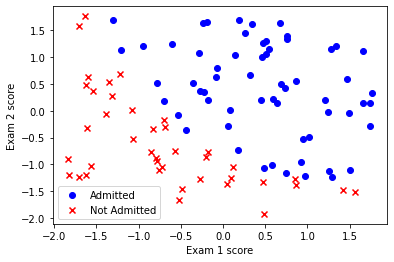

In [5]:
# Load the dataset
data = np.loadtxt('./data/data.csv', delimiter=',')
 
#Add intercept term 
data_1 = np.ones((data.shape[0], 4))
data_1[:, 1:] = data

# Standardize the data
# (It will still work without standardization, but may behave erratically)
data_1[:,1:3] = (data_1[:,1:3] - np.mean(data_1[:,1:3],axis=0)) / np.std(data_1[:,1:3],axis=0)

X = data_1[:, 0:3]
y = data_1[:, -1]

# Plot data 
pos = np.where(y == 1) # instances of class 1
neg = np.where(y == 0) # instances of class 0
plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='b')
plt.scatter(X[neg, 1], X[neg, 2], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()


N = X.shape[0]

# Initialize fitting parameters 
theta = np.random.randn(3,1) * 0.05

Now all it's remaining to do is to find the optimal parameters using gradient descent

> **Task 4**: Use the functions implemented so far to implement gradient descent, Eq.(4), for a fixed number of steps (say, $T=10\,000$) and learning rate to (say, $\alpha=0.005$).

In [6]:
alpha = 0.005
T = 10000

for i in range(T): 
    # insert here your code
    theta = theta - compute_grad(theta, X, y.reshape(-1,1)) * alpha

> **Task 5**: Implement a function to provide predictions $\hat{\mathbf{y}} \in \{0,1\}$ for any given $\mathbf{x}$ and $\hat{\mathbf{\theta}}$ (from the previous task) by assigning $\hat{\mathbf{y}}_i = 1$ whenever $\sigma_i \geq 0.5$. In other words, you turn logistic regression into a **classifier**. 

In [7]:
def predict(theta, X):
    # Predict whether each label is 0 or 1 using learned logistic regression parameters w. The threshold is set at 0.5

    #N = X.shape[0] # number of examples
    #yp = np.zeros(N) # predicted classes of examples
    
    ws=sigmoid(np.dot(X, theta))
    yp = np.where(ws >=0.5, 1, 0)

    return yp    


There is data provided in the *data/* folder. Suppose that each column represents an exam score during a course, with the class label indicated *admitted* or not into a Masters program at some university. We want a model to give the probability that a student will be admitted based on the two grades of two courses. Some plotting code is already provided. 
 
> **Task 6**: In the following we make a train-test split of the data provided, keeping the last 20 data points as test set away, and the first 80 as train. We use learning rate (alpha)=0.005 and max number of iterations (T)=1000. Evaluate the classifier (similarly to what was done in the first lab): plot the error $E(\mathbf{\theta}_t)$ both on the training and test set, for $t=1,\ldots,T$. 


Text(0, 0.5, '$Error$')

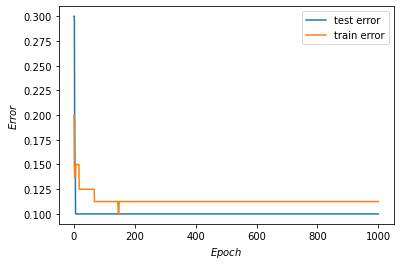

In [8]:
n_test=20

X_train = data_1[:-n_test, 0:3]
y_train = data_1[:-n_test, -1]
y_train = y_train.reshape(-1,1)

X_test = data_1[-n_test:, 0:3]
y_test = data_1[-n_test:, -1]
y_test = y_test.reshape(-1,1)

alpha = 0.005
T = 1000

#insert your code here
train_err=[]
test_err=[]

theta = np.random.randn(3,1) * 0.05 #random theta initialization
for i in range(T):
    #GD:
    theta = theta - compute_grad(theta, X_train, y_train) * alpha
    train_err.append(np.mean(np.abs(predict(theta,X_train)-y_train)))
    test_err.append(np.mean(np.abs(predict(theta,X_test)-y_test)))

plt.figure()
plt.plot(range(1,T+1), test_err, '-', label='test error')
plt.plot(range(1,T+1), train_err, '-', label='train error')
plt.legend(loc="upper right")
plt.xlabel('$Epoch$')
plt.ylabel('$Error$')

In [9]:
#Let's take a look at the final accuracy
print(predict(theta, X_test).T)
print(y_test.T)

accuracy_train = 1 - np.mean(np.abs(predict(theta,X_train)-y_train))
accuracy_test = 1 - np.mean(np.abs(predict(theta,X_test)-y_test))

print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)


[[1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]]
[[1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]]
Accuracy on training set: 0.8875
Accuracy on test set: 0.9


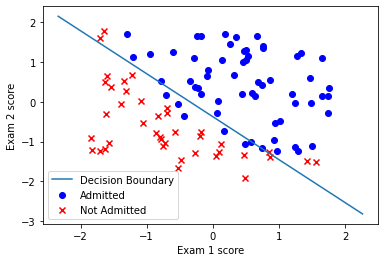

In [10]:
# Let's plot the learned decision boundary
plt.figure()
plot_x = np.array([min(X[:, 1])-0.5, max(X[:, 2])+0.5])
plot_y = (- 1.0 / theta[2,0]) * (theta[1,0] * plot_x + theta[0,0])
plt.plot(plot_x, plot_y)
plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='b')
plt.scatter(X[neg, 1], X[neg, 2], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Decision Boundary', 'Admitted', 'Not Admitted'])
plt.show()

> **Ques 2**: Knowing that the cost function is convex, are you convinced that with a suitable learning rate, gradient descent will always converge to the minimum? What are some examples of poor learning rates?

> **Ans**: Since the error function is convex, we can converge to a global minimum with a non-zero learning rate. However, note that a learning rate which is too large will overstep the minimum, since the gradient is not guaranteed to always pointing towards the minimum.

> **Task 7**: Following your considerations in the previous question -- can you find a better learning rate, such that you reduce error more efficiently (for smaller $T$?).

> **Task 8**: Instead of the whole training set, select a random subset (i.e., minibatch) of 10 examples for each iteration. This is known as **stochastic gradient descent**.

Text(0, 0.5, '$Error$')

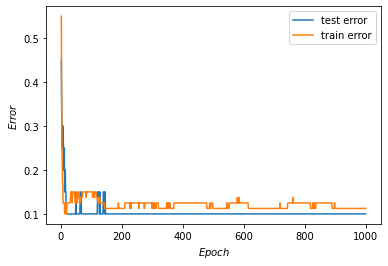

In [11]:
#see Task 6 implementation
alpha = 0.005
T = 1000

train_err=[]
test_err=[]
theta = np.random.randn(3,1) * 0.05 #random theta initialization
for i in range(T):
    #stochastic GD (task 8):
    n = np.random.choice(N-20,10) #picking 10 random elements (minibatch) from train
    theta = theta - compute_grad(theta, X_train[n], y_train[n]) * alpha
    train_err.append(np.mean(np.abs(predict(theta,X_train)-y_train)))
    test_err.append(np.mean(np.abs(predict(theta,X_test)-y_test)))

plt.figure()
plt.plot(range(1,T+1), test_err, '-', label='test error')
plt.plot(range(1,T+1), train_err, '-', label='train error')
plt.legend(loc="upper right")
plt.xlabel('$Epoch$')
plt.ylabel('$Error$')

> **Ques 3**: What are the advantages of stochastic gradient descent over classical gradient descent? (Especially with a non-convex loss function).

**Ans**: SGD is less costly than GD, with classical GD you have to compute the gradient over all training data if you want to have a consistent estimator of the true gradient, whereas with SGD you have a consistent estimator with few computations. Moreover SGD introduces noise via the variance of the estimator, shielding the model from overfitting. Finally, SGD can, and will always eventually, escape from local minima.

## K-Nearest Neighbours

The method $k$NN takes a different approach to modeling $P(Y=1|\mathbf{x})$. It is a *non-parametric* **lazy** method, and does not have a "model" as such. It predicts with
$$
P(Y=1|\mathbf{x}) \approx \frac{1}{k} \sum_{\mathbf{x}_i \in \textsf{Ne}_k(\mathbf{x})} y_i 
$$
where $\textsf{Ne}_k(\mathbf{x})$ is the *neighbourhood* of the $k$ training examples closest to $\mathbf{x}$ (typically measured by Euclidean distance). 

> **Ques 4**: What is the effect of different values of $k$? Hint: Draw on paper and/or empirically test different values.

> **Ans**: Small $k$ tends to overfit. However, if $k$ is too high, we run the risk of under-fitting.

> **Ques 5**: What is the complexity of making a prediction with a naive implementation of $k$-NN? When is this likely to be a problem in practice?

> **Ans**: $O(ndk)$: obviously an issue for large datasets with many instances $n$ or features $d$. 

> **Task 9**: Implement this function to create a $k$-NN classifier and evaluate it on the data provided. Hint: there is not really any training stage here; simple store the training instances to search over later.

In [12]:
from numpy.linalg import norm

def kNN(k, X, y, x):
    '''
    kNN classification of x
    -----------------------
        Input: 
        k: number of nearest neighbors
        X: training data           
        y: class labels of training data
        x: test instance

        return the label to be associated with x

        Hint: you may use the function 'norm' 
    '''
    # Enter here your solution for Task 9
    n,d = X.shape
    classes = list(set(y))

    # Take the distances from test instance x to all training instances
    distances = norm(X - x, axis=1)
    labels = np.arange(n)
    
    # Sort distances and re-arrange labels based on the distance of the instances
    idx = distances.argsort()
    labels = y[idx]
    
    cnt=[]
    for c in classes:
        cnt.append(list(labels[:k]).count(c))
        
    label=np.argmax(cnt)
    return classes[label]

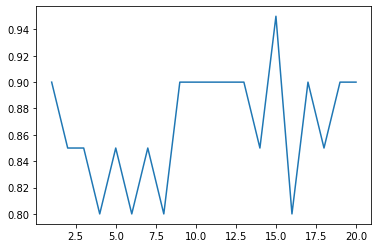

In [14]:
# Test the kNN method for various k
Kmax=20
knn_accuracy = np.zeros(Kmax)
for k in range(1, Kmax+1):
    y_pred = np.zeros(len(y_test))

    for i in range(len(y_pred)):
        y_pred[i] = kNN(k, X_train, y, X_test[i,:])

    knn_accuracy[k-1] = 1-np.mean(np.abs(y_pred.reshape(-1,1)-y_test))

    #print(y_pred)
    #print(y_test)

plt.plot(np.arange(1,Kmax+1), knn_accuracy)